<a href="https://colab.research.google.com/github/test-vico/learning-java-2825378/blob/master/Assignmentipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recursive result for length 100: 37
Iterative result for length 100: -1
Memory usage for length 100: 264.40234375 MB
Recursive result for length 1000: 271
Iterative result for length 1000: -1
Memory usage for length 1000: 263.4453125 MB
Recursive result for length 10000: 2747
Iterative result for length 10000: -1
Memory usage for length 10000: 263.4453125 MB
Recursive result for length 100000: 55721
Iterative result for length 100000: -1
Memory usage for length 100000: 263.4453125 MB
Recursive result for length 10000000: 2014606
Iterative result for length 10000000: -1
Memory usage for length 10000000: 847.80078125 MB


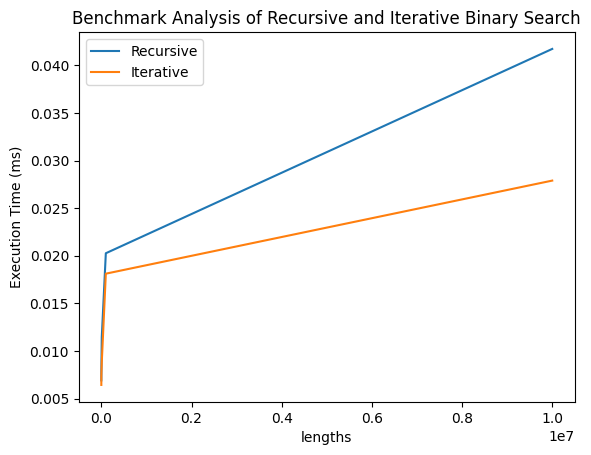

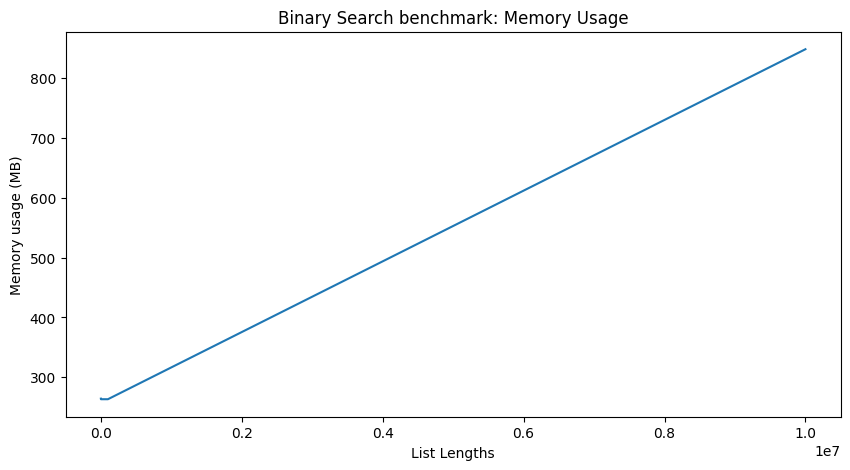

In [9]:
import random
import time
import matplotlib.pyplot as plt
import os
import psutil

def binary_search_iterative(arr, target):
    low = 0   #left
    high = len(arr) - 1     # right

    while low <= high:
      mid = (low + high) // 2

      if arr[mid] == target:
        return mid
      elif arr[mid] < target:
        low = mid + 1
      else:
          high = mid - 1
    return -1


def binary_search_recursive(arr, low, high, target):

    if low <= high:
      mid = (low + high) // 2

      if arr[mid] == target:
        return mid
      elif arr[mid] < target:

          return binary_search_recursive(arr, mid + 1, high, target)
      else:
          return binary_search_recursive(arr, low, mid - 1, target)
    else:
        return - 1

def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024


lengths = [100, 1000, 10000, 100000, 10000000]


recursive_times = []
iterative_times = []
memory_usage = []

for length in lengths:
    # Generate a random ordered list of integers
    arr = sorted(random.sample(range(length * 10), length))

    # choosing a random target
    target = random.choice(arr)

    # perform benchmark analysis of recursive binary search

    start_time = time.time()
    result_recursive = binary_search_recursive(arr, 0, length - 1, target)
    end_time = time.time()
    recursive_times.append((end_time - start_time) * 1000) # converted to miliseconds
    print(f"Recursive result for length {length}: {result_recursive}")

    # perform benchmark analysis for iterative binary search

    start_time = time.time()
    result_iterative = binary_search_iterative(arr, length + 1)
    end_time = time.time()
    iterative_times.append((end_time - start_time) * 1000) # converted to
    print(f"Iterative result for length {length}: {result_iterative}")


    # get memory usage

    memory_usage.append(get_memory_usage())
    print(f"Memory usage for length {length}: {memory_usage[-1]} MB")


plt.plot(lengths, recursive_times, label='Recursive')
plt.plot(lengths, iterative_times, label='Iterative')
plt.xlabel('lengths')
plt.ylabel('Execution Time (ms)')
plt.title('Benchmark Analysis of Recursive and Iterative Binary Search')
plt.legend()
plt.show()

# plot memory usage
plt.figure(figsize=(10, 5))
plt.plot(lengths, memory_usage)
plt.xlabel('List Lengths')
plt.ylabel('Memory usage (MB)')
plt.title('Binary Search benchmark: Memory Usage')
plt.show()

